In [1]:
import torch
import matplotlib.pyplot as plt

In this example the input is just 1-D tensor. The two values could be something like leaf size and leaf width.

In [2]:
x = torch.tensor([[1.,2.]])
x.shape

torch.Size([1, 2])

Label (y) is 5. The goal is to make a model that can map from x to y. This could be for example an index of maple. In that case the model could predict tree when leaf size and width given.

In [3]:
y = 5.

In [4]:
def initalize_parameters(size, variance=1.0):
    return (torch.randn(size) * variance).requires_grad_()

In [5]:
first_layer_output_size = 3

Parameteres are changed to make the predictions closer to the real values.

In [6]:
weights_1 = initalize_parameters((x.shape[1],first_layer_output_size))
weights_1, weights_1.shape

(tensor([[ 1.3673,  0.7495, -1.1173],
         [ 0.1360,  0.7500, -0.9327]], requires_grad=True), torch.Size([2, 3]))

In [7]:
bias_1 = initalize_parameters(1)
bias_1, bias_1.shape

(tensor([-2.5051], requires_grad=True), torch.Size([1]))

In [8]:
weights_2 = initalize_parameters((first_layer_output_size,1))
weights_2, weights_2.shape

(tensor([[-0.9567],
         [-1.6121],
         [ 0.6514]], requires_grad=True), torch.Size([3, 1]))

In [9]:
bias_2 = initalize_parameters(1)
bias_2, bias_2.shape

(tensor([0.2285], requires_grad=True), torch.Size([1]))

Neural network consists from **at least** two linear layer and non-linear layer between them. In linear layer weights are multiplied by x and then bias is added to that result.

In [10]:
def simple_neural_network(xb):
    # linear
    l1 = xb @ weights_1 + bias_1
    # non-linear
    l2 = l1.max(torch.tensor(0.0))
    # linear
    l3 = l2 @ weights_2 + bias_2
    return l3

Loss measures the difference between predictions and real values.

In [11]:
def loss_func(preds, yb):
    # Mean Squared Error (MSE)
    return ((preds-yb)**2).mean()

Learning rate makes sure gradient can't modify parameters too much once.

In [12]:
lr = 10E-4

In [13]:
def update_params(a):
    a.data -= a.grad * lr
    a.grad = None

Every loop contains three simple steps:
1. Make prediction
2. Calculate how good the prediction was compared to the real value
    - When calculating loss it automatically calculates gradient so we don't need to think about it
3. Update parameters by substracting gradient times learning rate

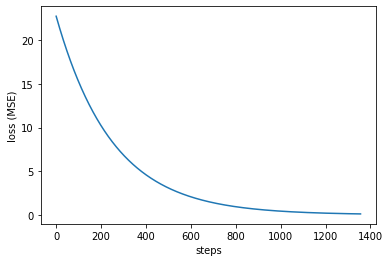

In [14]:
losses = []

while(len(losses) == 0 or losses[-1] > 0.1):
    preds = simple_neural_network(x)
    loss = loss_func(preds, y)
    loss.backward()
    
    update_params(weights_1)
    update_params(bias_1)
    
    update_params(weights_2)
    update_params(bias_2)
    
    losses.append(loss)
    
plt.plot(list(range(len(losses))), losses)
plt.ylabel('loss (MSE)')
plt.xlabel('steps')
plt.show()